<a href="https://colab.research.google.com/github/Amenazoha/Machine-learning-/blob/Main/Cancer_prediction_using_machine_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
data =pd.read_csv('/content/drive/MyDrive/data.csv') 
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
data.drop(data.index[0], inplace=True)

In [ ]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,...,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000
mean,14.109116,19.308042,91.842469,653.095062,0.096342,0.104081,0.088430,0.048709,0.181055,0.062780,...,16.237741,25.695944,107.033915,876.678660,0.132331,0.253659,0.271467,0.114214,0.289802,0.083875
std,3.516074,4.291807,24.246060,351.099060,0.014050,0.052391,0.079364,0.038641,0.027344,0.007036,...,4.812562,6.146335,33.433640,566.537304,0.022835,0.156636,0.208168,0.065473,0.061559,0.018032
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.695000,16.175000,75.100000,420.050000,0.086390,0.064710,0.029520,0.020310,0.161900,0.057750,...,13.010000,21.090000,84.095000,514.650000,0.116600,0.146600,0.114450,0.064530,0.250300,0.071365
50%,13.340000,18.870000,86.180000,546.400000,0.095870,0.092630,0.061260,0.033410,0.179200,0.061540,...,14.960000,25.440000,97.650000,684.600000,0.131300,0.211900,0.226400,0.099750,0.282200,0.079990
75%,15.765000,21.805000,103.750000,781.800000,0.105300,0.130400,0.130000,0.073820,0.195650,0.066120,...,18.655000,29.795000,125.050000,1060.000000,0.146000,0.338100,0.381900,0.161300,0.317750,0.092070
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

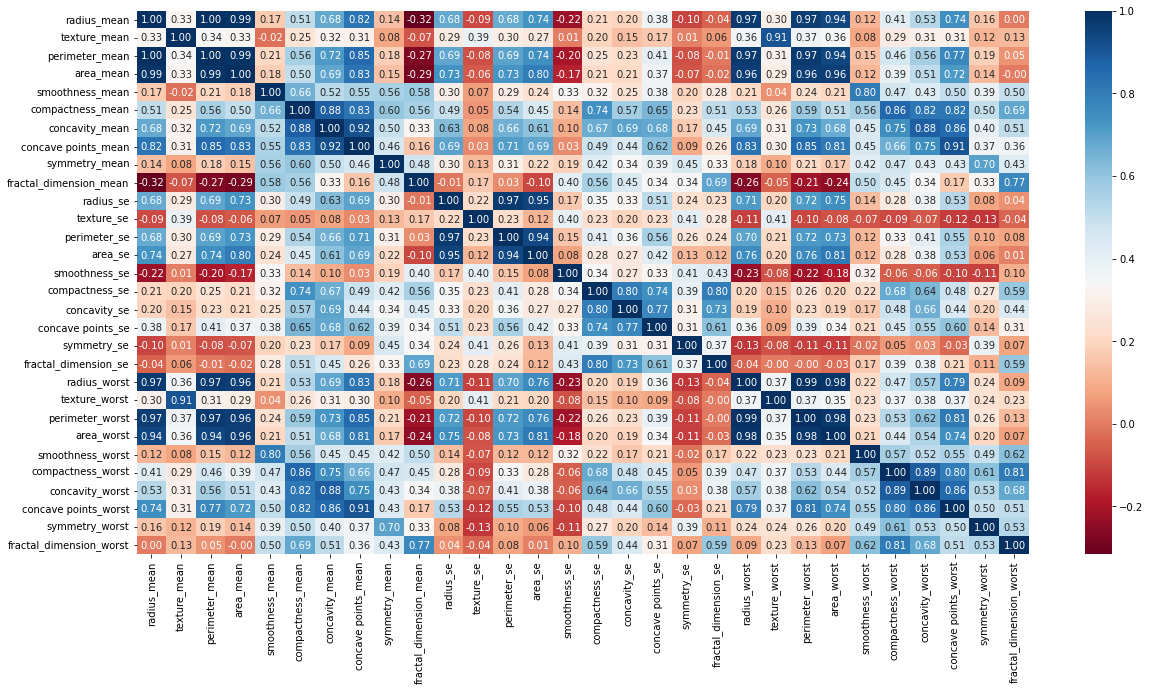

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(data.corr(), cmap='RdBu', annot=True, fmt=".2f");

In [ ]:
x = data.drop('diagnosis',axis=1)
y = data['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
rf = RandomForestClassifier()
rf = rf.fit(x_train,y_train)
predictions = rf.predict(x_test)

In [ ]:
accuracy_score(y_test, predictions)

0.9707602339181286

In [ ]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x2= x.drop(drop_list1,axis=1)
x_train, x_test, y_train, y_test = train_test_split(x2, y, test_size=0.3, random_state=42)

In [ ]:
rf = RandomForestClassifier()
rf = rf.fit(x_train,y_train)
predictions = rf.predict(x_test)

In [ ]:
accuracy_score(y_test, predictions)

0.9590643274853801